# Predict and verify task completion times study
### Author: Claudia, Sarah
### Reviewer: Sarah

## Test Design
We conduct a study in which we measure the task completion time of four calculating tasks and compare them with our own KLM operator values and the ones from Card, Moran and Newell (1980). For this purpose, we created a calculator and used our result from our previous experiment which determined our KLM values. The study was performed at home with a AspireVX 15 notebook, an external keyboard (with numpad and Qwertz design) and a mouse to reduce distractions. 

The study has a within-subject design where each participant solved all the four tasks once to minimize learning effects. 

In order to mitigate confounding and random variables the tasks of the study were presented in a counter balanced order (see Balanced Latin Squares at https://cs.uwaterloo.ca/~dmasson/tools/latin_square/). 

### Tasks
- adding the numbers from 1 to 20 using only the mouse
- adding the numbers from 1 to 20 using only the keyboard
- calculating the result of (3² + 4²) * 15.2 using only the mouse
- calculating the result of (3² + 4²) * 15.2 using only the keyboard

### Procedure
First, the participant was asked about his/her age, occupation and his/her gender was noted. The procedure of the study was explained to him/her and any questions were clarified. 
Afterwards participants solved the tasks. 
For each task the calculator script was executed again to adjust the config file to make the analysis easier. The participant id, the task name, the input type, input value and the timestamp is logged.

### Participants
Due to the current pandemic situation and limited time the selection of participants is limited.
The study was conducted with four participants (3 female, 1 male). Among them was one media informatics student, one mathematics student, one international and cultural business study student and one pensioner with the ages of 18, 20, 22 and 68.
Each participated once.

### Variables
The dependent variable is the task completion time which is calculated from the logged timestamps. 
The independent variables are the tasks and the input type whether a mouse or keyboard was used.
As control variables we document the keyboard, mouse and the global position of the window in the centre of the screen. 

# Analysis

### Import all relevant libraries

In [105]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

In [106]:
from PyQt5.QtCore import QDateTime
from PyQt5.QtCore import Qt

### All csv column names and csv items that are used more than once as variables

In [107]:
# column names
PARTICIPANT_ID = "participant_id"
TASK = "task"
INPUT_TYPE = "input_type"
TIMESTAMP = "timestamp"

TASK_COMPLETION_TIME = "task_completion_time_in_ms"  # TODO which unit?

# some table values
INPUT_MOUSE = "button_clicked"
INPUT_KEYBOARD = "key_pressed"

### Read csv files

## Calculate task completion time

In [108]:
def calc_time_diff(data):
    start_time = QDateTime.fromString(data[TIMESTAMP][0], Qt.ISODateWithMs)
    start_time_in_ms = QDateTime.toMSecsSinceEpoch(start_time)
    
    number = len(data) - 1
    end_time = QDateTime.fromString(data[TIMESTAMP][number], Qt.ISODateWithMs)
    end_time_in_ms = QDateTime.toMSecsSinceEpoch(end_time)
    
    return end_time_in_ms - start_time_in_ms

In [109]:
def update_table(new_table):
    new_table[TASK_COMPLETION_TIME] = np.NaN
    
    new_table.loc[len(new_table) - 1, TASK_COMPLETION_TIME] = calc_time_diff(new_table)
    new_table = new_table[new_table[TASK_COMPLETION_TIME].notna()][[PARTICIPANT_ID, TASK, INPUT_TYPE, TASK_COMPLETION_TIME]]
    
    return new_table

In [110]:
new_1_mouse_add = pd.read_csv("study_results/1_mouse_add.csv")
update_table(new_1_mouse_add)

,participant_id,task,input_type,task_completion_time_in_ms
50,1,A,button_clicked,41012.0


In [111]:
tables = {}
all_tables = []
for i in range (1, 17):  
    # read in csv files
    raw_data_mouse_add = pd.read_csv("study_results/{num}_mouse_add.csv".format(num = i))
    raw_data_mouse_complex = pd.read_csv("study_results/{num}_mouse_complex.csv".format(num = i))
    raw_data_key_add = pd.read_csv("study_results/{num}_key_add.csv".format(num = i))
    raw_data_key_complex = pd.read_csv("study_results/{num}_key_complex.csv".format(num = i))
    
    # TODO append the raw data to all_raw_tables
    all_tables.append(raw_data_mouse_add)
    all_tables.append(raw_data_mouse_complex)
    all_tables.append(raw_data_key_add)
    all_tables.append(raw_data_key_complex)
    
    # generate table new tables
    new_table_name_mouse_add = "time_diff_mouse_add_{num}".format(num = i)
    tables[new_table_name_mouse_add] = raw_data_mouse_add  
    
    new_table_name_mouse_complex = "time_diff_mouse_complex_{num}".format(num = i)
    tables[new_table_name_mouse_complex] = raw_data_mouse_complex  
    
    new_table_name_key_add = "time_diff_key_add_{num}".format(num = i)
    tables[new_table_name_key_add] = raw_data_key_add 
    
    new_table_name_key_complex = "time_diff_key_complex_{num}".format(num = i)
    tables[new_table_name_key_complex] = raw_data_key_complex  
    
    
    # calculate time difference and filter data
    tables[new_table_name_mouse_add] = update_table(tables[new_table_name_mouse_add])
    tables[new_table_name_mouse_complex] = update_table(tables[new_table_name_mouse_complex])
    tables[new_table_name_key_add] = update_table(tables[new_table_name_key_add])
    tables[new_table_name_key_complex] = update_table(tables[new_table_name_key_complex])

### Combine tables and filter them

In [112]:
# whole dataset
df_all_tables = pd.concat(all_tables)
df_all_tables.to_csv("all_results.csv", index=False)

input_mouse = df_all_tables[df_all_tables[INPUT_TYPE] == INPUT_MOUSE]

input_keyboard = df_all_tables[df_all_tables[INPUT_TYPE] == INPUT_KEYBOARD]

# TODO do we need those dataframes?
task_a = df_all_tables[df_all_tables[TASK] == 'A']
task_b = df_all_tables[df_all_tables[TASK] == 'B']
task_c = df_all_tables[df_all_tables[TASK] == 'C']
task_d = df_all_tables[df_all_tables[TASK] == 'D']

### Statistics for relevant tables

In [113]:
task_completion.describe()

,participant_id,task_completion_time_in_ms
count,2151.000000,64.000000
mean,8.426778,17462.656250
std,4.640881,10401.639242
min,1.000000,5878.000000
25%,4.000000,10472.750000
50%,8.000000,12949.500000
75%,12.000000,27710.000000
max,16.000000,42432.000000


In [114]:
input_mouse.describe()

,participant_id,task_completion_time_in_ms
count,1075.000000,32.000000
mean,8.426047,23560.000000
std,4.630768,11553.442939
min,1.000000,9280.000000
25%,4.000000,11173.000000
50%,8.000000,27892.000000
75%,12.000000,33016.750000
max,16.000000,42432.000000


In [115]:
input_keyboard.describe()

,participant_id,task_completion_time_in_ms
count,1076.000000,32.000000
mean,8.427509,11365.312500
std,4.653116,3105.242315
min,1.000000,5878.000000
25%,4.000000,8917.250000
50%,8.000000,12152.500000
75%,12.000000,13936.750000
max,16.000000,15988.000000


### Boxplots

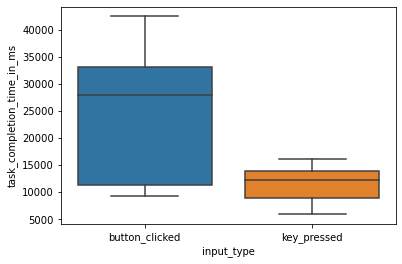

In [116]:
# TODO comparision
box_plot_input_type = sns.boxplot(
    data=task_completion,
    x=INPUT_TYPE,
    y=TASK_COMPLETION_TIME
)

box_plot_input_type.set(xlabel=INPUT_TYPE, ylabel=TASK_COMPLETION_TIME)
plt.show()

### T-test

In [117]:
# pg.homoscedasticity(data=task_completion, dv=TASK_COMPLETION_TIME, group=INPUT_TYPE, method="bartlett")
# pg.normality(data=task_completion, dv=TASK_COMPLETION_TIME, group=INPUT_TYPE)
# pg.welch_anova(data=task_completion, dv=TASK_COMPLETION_TIME, between=INPUT_TYPE)

## Results

## Discussion